# 실습 1

점 4개 생성

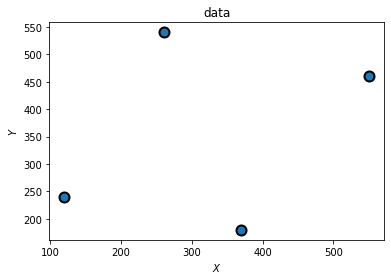

In [ ]:
# from sklearn.datasets import make_classification
import numpy as np
import matplotlib .pyplot as plt

points = [(120,240), (370,180), (550,460), (260,540)]
points = np.array(points) # 이미지에 출력하기 위해 

plt.title("data")
plt.scatter(points[:, 0], points[:, 1], marker='o', s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

# circumcircle 함수 구현

278.3093525179856 348.78896882494007 192.08563411316737


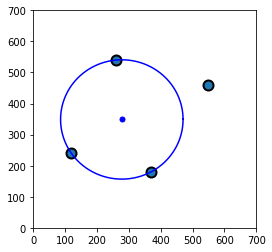

In [ ]:
import math
triangle = [] # 분할 삼각형
center = [] # 외접원의 중심
radius = [] # 외접원의 반지름

# 3개의 점을 받아 외접원을 계산하는 함수
def circumcircle(pt1,pt2,pt3): #, display = True):
    # TODO 
    A = pt2[0] - pt1[0]
    B = pt2[1] - pt1[1]
    C = pt3[0] - pt1[0]
    D = pt3[1] - pt1[1]
    E = A * (pt1[0] + pt2[0]) + B * (pt1[1] + pt2[1])
    F = C * (pt1[0] + pt3[0]) + D * (pt1[1] + pt3[1])
    G = 2.0 * (A * (pt3[1] - pt2[1]) - B * (pt3[0] - pt2[0]))
    if G == 0 : 
      c_x = pt1[0]
      c_y = pt1[1]
    else : 
      c_x = (D * E - B * F) / G
      c_y = (A * F - C * E) / G
    radius = math.sqrt(math.pow(c_x - pt3[0], 2) + math.pow(c_y - pt3[1], 2))
    return c_x,c_y,radius

c_x,c_y,radius = circumcircle(points[0],points[1],points[3])
print(c_x,c_y,radius)


# if display:
plt.figure( figsize=(4,4) )
plt.scatter(points[:, 0], points[:, 1], marker='o', s=100, edgecolor="k", linewidth=2)

M = 1000
angle = np.exp(1j * 2 * np.pi / M)
angles = np.cumprod(np.ones(M + 1) * angle)
x, y = c_x +  radius * np.real(angles), c_y + radius * np.imag(angles)
plt.plot( x, y, c='b')
plt.scatter( [c_x], [c_y], s=25, c= 'b')
plt.xlim( [ 0, 700] )
plt.ylim( [ 0, 700] )
plt.show()

In [ ]:
points = [(120,240), (370,180), (550,460), (260,540)]

# 입력으로 들어온 점이 외접원 내에 있는지 체크하는 함수
def isInCircumcircle(pts, _pt):
    # TODO
    c_x, c_y, radius = circumcircle(pts[0], pts[1], pts[2])

    if math.pow(radius, 2) >= math.pow(c_x - _pt[0], 2) + math.pow(c_y - _pt[1], 2) :
      return True
    else:
      return False
    pass


def display( ):
    plt.figure( figsize=(8,4) )
    plt.subplot( 1, 2, 1)
    X, Y = [], []

    for pt in points:
        X.append( pt[0] )
        Y.append( pt[1] )

    plt.scatter(  X, Y, c='r', s=25)
    plt.subplot( 1, 2, 2)

    for i in range(len(triangle)):
        tri = triangle[i]
        print(tri[0])
        # T = self.mesh[key]
        plt.plot( [tri[0][0], tri[1][0]], [tri[0][1], tri[1][1]], 'g-', linewidth=1)
        plt.plot( [tri[1][0], tri[2][0]], [tri[1][1], tri[2][1]], 'g-', linewidth=1)
        plt.plot( [tri[2][0], tri[0][0]], [tri[2][1], tri[0][1]], 'g-', linewidth=1)
    plt.scatter(  X, Y, c='r', s=25)
    plt.show()

# 가능한 조합들을 체크함
def combinations(arr, n):
    result = []
    if n > len(arr) : 
      return result
    if n == 1 : 
      for i in arr : 
        result.append([i])
    elif n > 1 : 
      for i in range(len(arr) - n + 1) : 
        for j in combinations(arr[i + 1:], n - 1) : 
          result.append([arr[i]] + j)
    return result
    


[[(120, 240), (370, 180), (550, 460)], [(120, 240), (370, 180), (260, 540)], [(120, 240), (550, 460), (260, 540)], [(370, 180), (550, 460), (260, 540)]]
4
(260, 540)
296.6089108910891 425.03712871287127 255.79180285622982
(550, 460)
278.3093525179856 348.78896882494007 192.08563411316737
(370, 180)
353.5947046843177 313.65580448065174 244.93195706204938
(120, 240)
371.10878661087867 377.14435146443515 197.1474694792738
triangle: [[(120, 240), (370, 180), (260, 540)], [(370, 180), (550, 460), (260, 540)]]
(120, 240)
(370, 180)


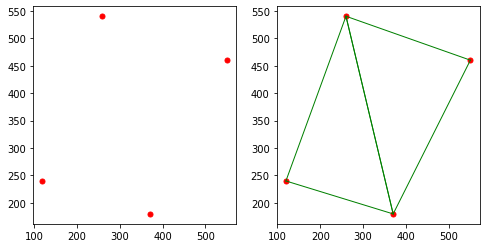

In [ ]:
# main #
triangle = [] # 생성한 삼각형 저장

combination = combinations(points, 3) # 가능한 조합들을 체크함
print(combination)
print(len(combination))

for pts in combination:
    for i in range(len(points)):
        if points[i] not in pts:
            print(points[i])
            disinclude_pt = points[i]
        
    c_x, c_y, radius = circumcircle(pts[0], pts[1], pts[2]) # 외접원을 만들고
    print(c_x, c_y, radius)
    
    # 다른점이 생성된 외접원 내에 있는지 확인
    if not isInCircumcircle(pts, disinclude_pt): # 외접원 안에 없으면
        triangle.append(pts)# 다른 점이 외접원 내에 없다면 3개의 점을 삼각형으로 저장

print('triangle:',triangle)

display()

# 실습 2

In [ ]:
#title This code cell defines the input data, generates and plots the delaunay triangulation.
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import *
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


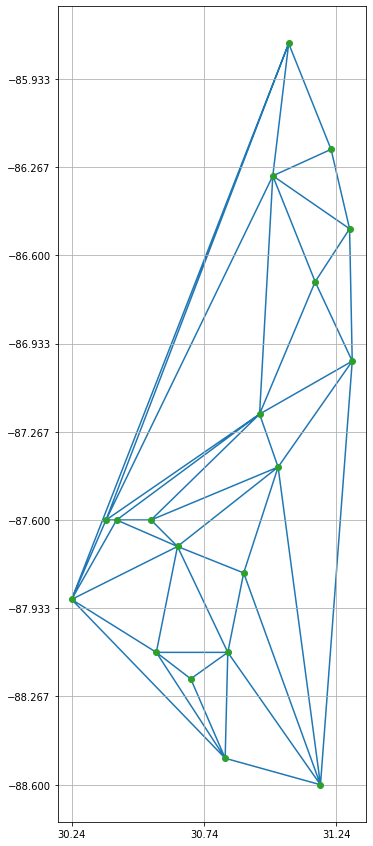

In [ ]:
grid_size = [5, 13]
fig_size = (30, 15)


# A : [31.22, -86.2]
# B : [30.83, -88.1]


#@title This code cell defines the input data, generates and plots the delaunay triangulation.

from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import *
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
!pip install -U scikit-learn

# using the 19 points from Dr. Tzeng's email.
points = np.array([
[31.3, -87], [31.29, -86.5], [31.22, -86.2], [31.18, -88.6],
[31.16, -86.7], [31.06, -85.8], [31.02, -87.4], [31, -86.3], 
[30.95, -87.2], [30.89, -87.8], [30.83, -88.1], [30.82, -88.5], 
[30.69, -88.2], [30.64, -87.7], [30.56, -88.1], [30.54, -87.6], 
[30.41, -87.6], [30.37, -87.6], [30.24, -87.9]
])

values = np.array([5759, 1439, 18827, 20267, 7253, 15893, 2879, 11573, 17387, 
                   4319, 26243, 0, 24641, 21707, 23147, 10133, 8693, 13013, 14453])

norm = np.linalg.norm(values)
norm_values = values / norm

# add the values for each coordinate, and format the data
df = pd.DataFrame(data=points)
df.columns = ['X', 'Y']
df['val'] = values # from the excel sheet
df['norm_val'] = norm_values

#TODO 
x_range, y_range = 2, 4


tri = Delaunay(points, incremental=True)
#plt.triplot(points[:,0], points[:,1], tri.simplices)
#plt.plot(points[:,0], points[:,1], 'o')

# TODO #plot the triangulation

fig, ax = plt.subplots(figsize = fig_size)

# Add the grid

x_ticks = np.arange(df.X.min() - (x_range/(grid_size[0] - 1)), df.X.max() + (x_range/(grid_size[0] - 1)), (x_range/(grid_size[0] - 1)))
y_ticks = np.arange(df.Y.min() - (y_range/(grid_size[1] - 1)), df.Y.max() + (y_range/(grid_size[1] - 1)), (y_range/(grid_size[1] - 1)))
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_aspect('equal')
ax.grid()
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


# 실습 4

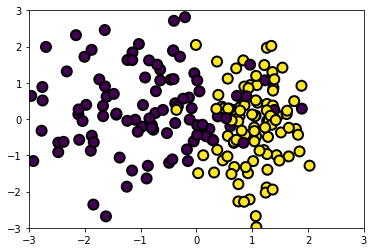

In [ ]:
import numpy as np
import matplotlib .pyplot as plt
import cv2
from sklearn.datasets import make_classification
from scipy.spatial import Voronoi, voronoi_plot_2d


# make_classification 이용하여 데이터 생성
X, y = make_classification(n_features=2, n_samples = 200, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=3)
                           
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

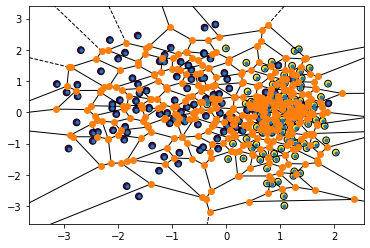

In [ ]:
vor = Voronoi(X, qhull_options = 'Qc')

# TODO voronoi_plot_2d  이용 Fig 생성
fig = voronoi_plot_2d(vor)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=45, edgecolor="k", linewidth=1)
#for i in vor.point_region:
#    plt.annotate(str(i), (vor.points[i][0], vor.points[i][1]), size = 12)
plt.show()

In [ ]:
# 보로노이 다이어그램의 이웃들을 체크해서 현재 클래스와 같은 클래스만 존재한다면 현재 노드는 제거

# 버릴지 아닐지 마킹할 변수 선언
mark = np.zeros(len(X))

# 현재 지역과 인접한 지역의 인덱스 정보를 모음
# voronoi.ridge_point : 인접한 보로노이의 지역의 인덱스가 저장되어 있음. (idx1, idx2) 의 형태
def get_neighbor_region_idx(curr_idx, voronoi):
    # TODO
    neighbor_pair = []
    for a in voronoi.ridge_points : 
      if a[0] == curr_idx : 
        neighbor_pair.append(a)
    return neighbor_pair


for i in range(len(X)):
    # 현재 인덱스 지역과 인접한 모든 지역의 정보를 받음
    neighbor_pair = get_neighbor_region_idx(i, vor)            
    
    
    #
    # print(neighbor_pair)
    # Ex ) 
    # [(0, 26), (0, 191), (0, 3), (0, 160), (0, 180), (0, 123), (0, 59)]
    # [(1, 23), (1, 184), (1, 127), (1, 113), (1, 152), (1, 131)]
    # [(2, 93), (2, 74), (2, 33), (2, 13), (2, 103)]
    # ...


    # 거리 계산
    shortest_dist = 99999999
    shortest_idx = -1
    
    # 인접한 모든 지역의 클래스를 체크함
    isSame = True
    for j in range(len(neighbor_pair)):
        idx1 = neighbor_pair[j][0]
        idx2 = neighbor_pair[j][1]
        
        # 레이블 비교
        if y[idx1]!=y[idx2]: # 만약 레이블이 다르다면 
            isSame = False #나감
            break
                    
    # 모든 인접한 지역이 다 같은 클래스라면 마킹.
    # 마킹해놓고 나중에 한꺼번에 버림
    if isSame == True:
        mark[i] = 1
        
# 새로운 포인트 좌표 배열
new_pt = np.where(mark<1) # 마킹이 안된것을 남김

pt_remain = X[new_pt]
labels_remain = y[new_pt]


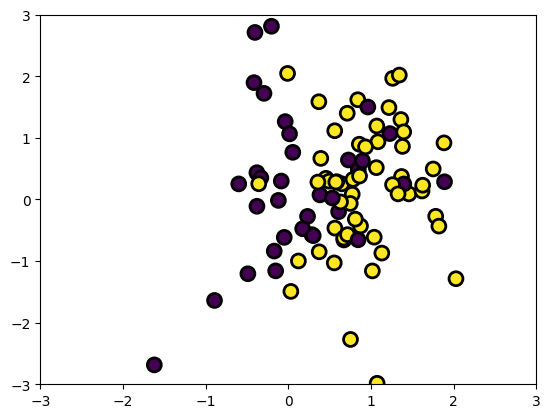

In [ ]:
plt.scatter(pt_remain[:, 0], pt_remain[:, 1], marker='o', c=labels_remain,
            s=100, edgecolor="k", linewidth=2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_X, test_y = make_classification(n_features=2, n_samples =30, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=3)

# Editing 전의 데이터로 학습
knn_classifier1 = KNeighborsClassifier(n_neighbors=1)
# TODO classifier 학습, predict
knn_classifier1.fit(X, 
                    y)

y_pred = knn_classifier1.predict(test_X) 
print(f'Accuracy:', (accuracy_score(test_y, y_pred)))


# Editing 후의 데이터로 학습
knn_classifier2 = KNeighborsClassifier(n_neighbors=1)
# TODO classifier 학습, predict
knn_classifier2.fit(pt_remain, labels_remain)
y_pred = knn_classifier2.predict(test_X) 
print(f'Accuracy:', (accuracy_score(test_y, y_pred)))

Accuracy: 0.7
Accuracy: 0.7


# 실습 3

In [ ]:
class Point:
	def __init__(self, x, y):
		self.x = x
		self.y = y

	def __str__(self): 
		return str((self.x, self.y))
	def __repr__(self):
		return (self.x, self.y)

class Line:
	def __init__(self, m, b):
		self.m = m
		self.b = b
def midpoint(p1, p2):
	m_p = ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)
	return m_p


def find_b(p, m):
	return p[1] - m * p[0]


def slope(p1, p2):

	# If the slope is vertical
	if p2[0] == p1[0]:
		return 'undefined'
	return (p2[1] - p1[1])/(p2[0] - p1[0])


def slope_perpendicular_bisector(p1, p2):
	# If the line is horizontal
	if p2[0] == p1[0]:
		return 0
	
	if p2[1] == p1[1]:
		return 'undefined'
		
	return -((p2[0] - p1[0])/(p2[1] - p1[1]))


def perpendicular_bisector(p1, p2, xmin, xmax, ymin, ymax):

	m = slope_perpendicular_bisector(p1, p2)
	m_p = midpoint(p1, p2)

	if m == 'undefined':
		p_r1 = (m_p[0], ymin-2 )
		p_r2 = (m_p[0], ymax+2 )
			
	elif m == 0:
		p_r1 = (xmin-2, m_p[1])
		p_r2 = (xmax+2, m_p[1])
	else:
		b = find_b(m_p, m)
		x_small = xmin - 2
		x_large = xmax + 2

		# Find points that the bisector intersect the rectangle
		# Add more cases
		y_r1 = m*(x_small - 1) + b
		p_r1 = (x_small - 1, y_r1)
		y_r2 = m*(x_large+1) + b
		p_r2 = (x_large + 1, y_r2)

	return p_r1, p_r2
	
def intersection(p1, q1, p2, q2, shift=None):
	m1 = slope(p1, q1)
	if shift:
		m1 -= shift
	m2 = slope(p2, q2)

	if m1 != 'undefined':
		b1 = find_b(p1, m1)
	if m2 != 'undefined':
		b2 = find_b(p2, m2)

	# If the line is vertical, we take the x of the point to be b
	if m1 == 'undefined' and m2 == 0:
		x = p1[0]
		y = p2[1]
	elif m2 == 'undefined' and m1 == 0:
		x = p2[0]
		y = p1[1]
	elif m1 == 'undefined':
		x = p1[0]
		y = m2*x+b2
	elif m2 == 'undefined':
		x = p2[0]
		y = m1*x+b1
	
	else:
		x = (b2-b1)/(m1-m2)
		y = m1*x+b1
	return (x, y)

if __name__ == '__main__':
	p1 = (7, -5)
	p2 = (-7, 5)

	print(slope(p1, p2))


In [ ]:
import math as m


class Xygraph:
    """Represents a set of vertices connected by undirected edges.
    The vertices are stored in a list of coordinates, while
    the edges are stored as a pair of indices (i,j) of the vertices
    list.
    """

    def __init__(self, vl=[], el=[]):
        """Creates the 2D graph formed by a list of vertices (x,y)
        and a list of indices (i,j)
        """
        self.vl = vl
        self.el = el
        if self.vl != []:
            self.minmax()

    def minmax(self):
        """Determines the boundary box of the vertices in the graph"""
        vx = [v[0] for v in self.vl]
        vy = [v[1] for v in self.vl]
        self.xmax, self.xmin = max(vx), min(vx)
        self.ymax, self.ymin = max(vy), min(vy)

In [ ]:

from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import matplotlib 
from PIL import Image, ImageDraw

#matplotlib.use('GTK3Cairo')


def voronoid(points, xmin=None, xmax=None, ymin=None, ymax=None):
    
    if xmin==None:
        xygraph = Xygraph(vl=points)
        xmin = xygraph.xmin - 1
        xmax = xygraph.xmax + 3
        ymin = xygraph.ymin - 1
        ymax = xygraph.ymax + 1


    # Ensure there is no points in the same location
    points = list(set(points))
    n = len(points)

    # Sort points in advance by the distance to the l
    v = (xmin, ymin)

    points.sort(key=lambda p: ((p[0]-v[0])**2 +
                               (p[1]-v[1])**2)**(1/2), reverse=True)
    
    # Points displayed
    cur_points = []

    p = points.pop()

    cur_points.append(p)
    cur_points = cur_points

    V = Dcel(vl=[(xmin, ymax), (xmin, ymin), (xmax, ymin), (xmax, ymax)], el=[
             (0, 1), (1, 2), (2, 3), (3, 0)], site=p, border=[xmin, xmax, ymin, ymax])

    for i in range(n-1):
        p = points.pop()

        cur_points.append(p)
        # Closest site to the new site p_i+1
        
        nbrs = NearestNeighbors(n_neighbors = 2, algorithm = 'ball_tree').fit(np.array(cur_points))
        # TODO  NearestNeighbors -> n_nighbors = 2 , algorithm = 'ball_tree' / fit

        indices = nbrs.kneighbors(np.array(p).reshape(1, -1), return_distance=False)
        # TODO 
        

        pc = cur_points[indices[0][1]]

        # face associated with pc
        fn = V.getFace(pc)

        p1, q1 = perpendicular_bisector(p, pc, xmin, xmax, ymin, ymax)

        intersect_vl = []
        intersect_edges = {}

        vertices = [v.coord for v in V.vertices]

        move = -10e-2
        m = {}
        findEdge = True
        eps = 10e-3

        for h in fn.hedges:

            m[h] = slope(h.v1.coord, h.origin.coord)

            if doIntersect(p1, q1, h.vertices[0].coord, h.vertices[1].coord):

                # Find the intersection between the bisector and the intersect line

                pt = intersection(
                    p1, q1, h.vertices[0].coord, h.vertices[1].coord)
                
                # Handle the intersect vertex and is the same as the existing vertex
                if pt in vertices and findEdge:
                    shift = 0.0000000001
                    pt_before = pt
                    pt = intersection(
                        p1, q1, h.vertices[0].coord, h.vertices[1].coord, shift)
                
                    if abs(pt_before[0]-pt[0]) >  eps:
                        if pt_before[0]-pt[0] > 0:
                            pt = (-eps, pt[1])
                        else:
                            pt = (eps, pt[1])
                    
                   
                    if not isOnLine(pt, h):
                        continue
                    else:
                        findEdge = False


                vertex = Vertex(pt[0], pt[1])

                intersect_vl.append(vertex)
                intersect_edges[vertex] = h

        V.update(p, pc, intersect_vl, intersect_edges, xmin, xmax, ymin, ymax)
  
    regions = []
    for f in V.faces.values():
        region = []
        for v in f.vertices:            
            try:
                region.append(v.coord)
            except:
                pass
        
        regions.append(list(set(region)))


    return xmin, xmax, ymin, ymax, np.array(cur_points),np.array(regions) 
    
    

if __name__ == '__main__':

    np.random.seed(10)
    points = np.random.randint(0, 10, (5, 2))
    points = [(x[0], x[1]) for x in points]


    
    voronoid = voronoid(points)
    
    print(voronoid[0:5])




